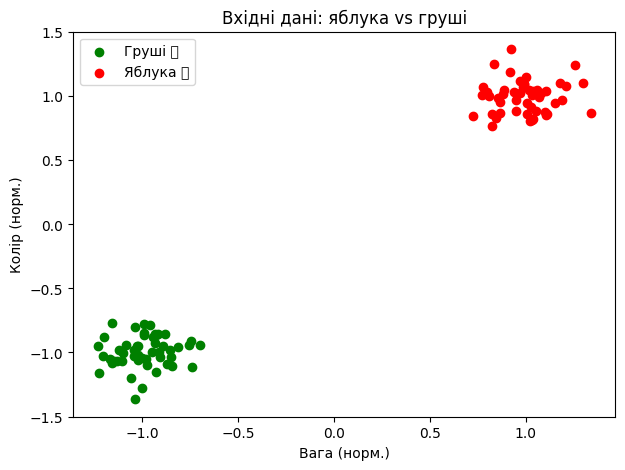

Епоха 1/5 — помилки: 1
Епоха 2/5 — помилки: 0
Епоха 3/5 — помилки: 0
Епоха 4/5 — помилки: 0
Епоха 5/5 — помилки: 0


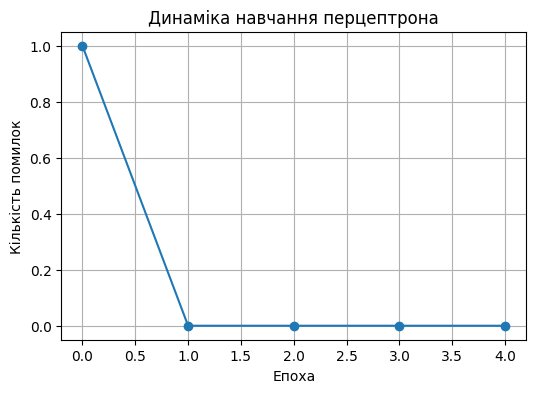

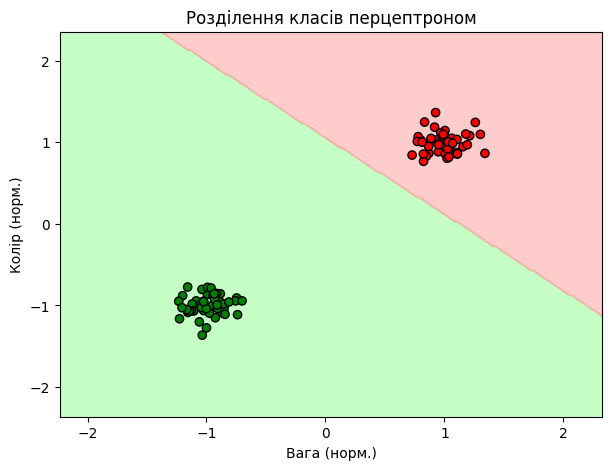

0
Зразок 1: [0.1 0.1] -> Груша 🍐
1
Зразок 2: [1.  0.8] -> Яблуко 🍎
0
Зразок 3: [0.3 0.6] -> Груша 🍐


In [4]:
"""
====================================================================
   ПЕРЦЕПТРОН: НАЙПРОСТІША НЕЙРОННА МЕРЕЖА
   Демонстраційний приклад для студентів
====================================================================

Задача: Навчити перцептрон відрізняти два класи об'єктів (яблука 🍎 та груші 🍐)
за двома ознаками:
 - Вага (г)
 - Інтенсивність кольору (0 - світлий, 1 - насичений)

Перцептрон має:
 - 2 входи (вага, колір)
 - 1 вихід (0 = груша, 1 = яблуко)
====================================================================
"""

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# ---------------------------
# 1. Генеруємо синтетичні дані
# ---------------------------
np.random.seed(42)

# Клас 0: груші (легкі, світлі)
pear_weight = np.random.normal(130, 5, 50) 
pear_color = np.random.normal(0.2, 0.05, 50)

# Клас 1: яблука (важчі, темніші)
apple_weight = np.random.normal(200, 5, 50)
apple_color = np.random.normal(0.9, 0.05, 50)

# Об'єднуємо дані
X = np.vstack((
    np.column_stack((pear_weight, pear_color)),
    np.column_stack((apple_weight, apple_color))
))
y = np.array([0]*50 + [1]*50)

# Нормалізація ознак
X = (X - X.mean(axis=0)) / X.std(axis=0)

# ---------------------------
# 2. Візуалізація вихідних даних
# ---------------------------
plt.figure(figsize=(7,5))
plt.scatter(X[y==0][:,0], X[y==0][:,1], color='green', label='Груші 🍐')
plt.scatter(X[y==1][:,0], X[y==1][:,1], color='red', label='Яблука 🍎')
plt.title("Вхідні дані: яблука vs груші")
plt.xlabel("Вага (норм.)")
plt.ylabel("Колір (норм.)")
plt.legend()
plt.show()

# ---------------------------
# 3. Реалізація перцептрона з нуля
# ---------------------------
class Perceptron:
    def __init__(self, n_inputs, learning_rate=0.1, epochs=50):
        self.lr = learning_rate
        self.epochs = epochs
        self.weights = np.zeros(n_inputs)
        self.bias = 0.0

    def step(self, x):
        """Порогова функція активації"""
        return np.where(x >= 0, 1, 0)

    def predict(self, X):
        """Передбачення класу"""
        linear_output = np.dot(X, self.weights) + self.bias
        return self.step(linear_output)

    def fit(self, X, y):
        """Навчання моделі"""
        history = []
        for epoch in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                y_pred = self.predict(xi)
                update = self.lr * (target - y_pred)
                self.weights += update * xi
                self.bias += update
                errors += int(update != 0.0)
            history.append(errors)
            print(f"Епоха {epoch+1}/{self.epochs} — помилки: {errors}")
        return history

# ---------------------------
# 4. Навчання моделі
# ---------------------------
model = Perceptron(n_inputs=2, learning_rate=0.1, epochs=5)
errors_history = model.fit(X, y)

# ---------------------------
# 5. Візуалізація процесу навчання
# ---------------------------
plt.figure(figsize=(6,4))
plt.plot(errors_history, marker='o')
plt.title("Динаміка навчання перцептрона")
plt.xlabel("Епоха")
plt.ylabel("Кількість помилок")
plt.grid(True)
plt.show()

# ---------------------------
# 6. Побудова розділяючої лінії
# ---------------------------
def plot_decision_boundary(model, X, y):
    cmap_light = ListedColormap(['#A0FFA0', '#FFAAAA'])
    cmap_bold = ['green', 'red']

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(7,5))
    plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.6)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(cmap_bold), edgecolor='k')
    plt.title("Розділення класів перцептроном")
    plt.xlabel("Вага (норм.)")
    plt.ylabel("Колір (норм.)")
    plt.show()

plot_decision_boundary(model, X, y)

# ---------------------------
# 7. Перевірка на нових даних
# ---------------------------
new_samples = np.array([
    [0.1, 0.1],  # легка і світла -> груша
    [1.0, 0.8],  # важка і темна -> яблуко
    [0.3, 0.6],  # проміжне
])

predictions = model.predict(new_samples)
for i, p in enumerate(predictions):
    print(p)
    label = "Яблуко 🍎" if p == 1 else "Груша 🍐"
    print(f"Зразок {i+1}: {new_samples[i]} -> {label}")
